In [8]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset
df = pd.read_csv('aug_train.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
#checking the shape of the dataset
df.shape

(19158, 14)

In [5]:
#checking the datasets summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
#checking the statistical summary
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
#checking for null values
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
#checking the unique values of the target column
df.target.unique()

array([1., 0.])

In [9]:
df.target.nunique()

2

In [10]:
#checking the data types
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [11]:
#checking for the numbers of unique values of all columns
df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [12]:
#checking for correlation between the columns
df.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


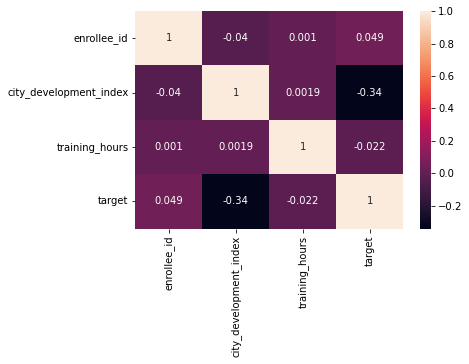

In [13]:
#checking for relationships using heatmap
sns.heatmap(df.corr(), annot=True);

In [14]:
#checking for duplicates
df.duplicated().sum()

0

### Brief Summary of the analysis done

- There are a lot null values, null values should be filled with the mode
- There are no duplicates
- The columns will be looked at to determine if their data types are correct
- columns not needed will be dropped

## Cleaning and EDA

In [15]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [16]:
df.shape

(19158, 14)

In [17]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [18]:
#checking the data type of company size
df.company_size.dtypes

dtype('O')

In [19]:
df.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [20]:
df.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [21]:
df.target.unique()

array([1., 0.])

The datatypes for target needs to be changed to category data type from float

Last new job and company size values should be adjusted

First, null values will be cleaned

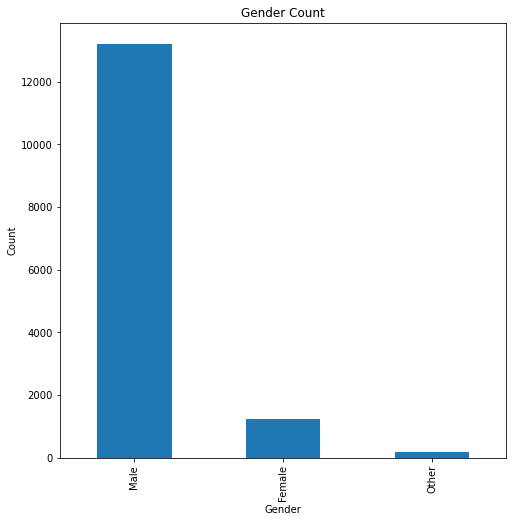

In [22]:
#fill up gender column missing values with the mode

df.gender.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count');

In [23]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [24]:
mode_gender = df['gender'].mode()
mode_gender

0    Male
Name: gender, dtype: object

In [25]:
df['gender'] = df['gender'].fillna('Male')

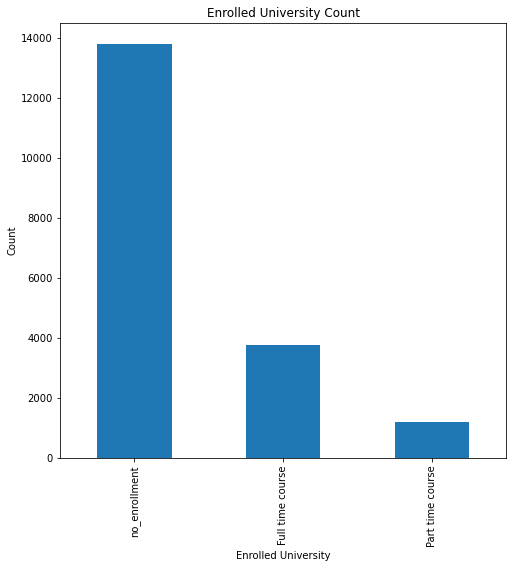

In [26]:
#fill up enrolled university column missing values with the mode
#view the value count with countplot

df.enrolled_university.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Enrolled University Count')
plt.xlabel('Enrolled University')
plt.ylabel('Count');

In [27]:
df['enrolled_university'].mode()


0    no_enrollment
Name: enrolled_university, dtype: object

In [28]:
df['enrolled_university'] = df['enrolled_university'].fillna('no_enrollment')

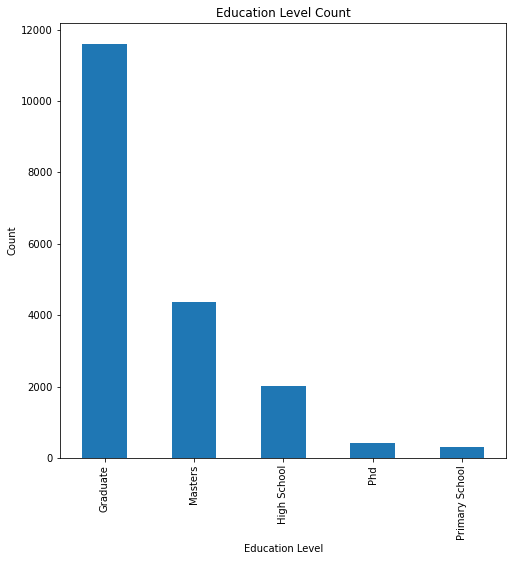

In [29]:
#fix education level
df.education_level.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Education Level Count')
plt.xlabel('Education Level')
plt.ylabel('Count');

In [30]:
df['education_level'].mode()

0    Graduate
Name: education_level, dtype: object

In [31]:
df['education_level'] = df['education_level'].fillna('Graduate')

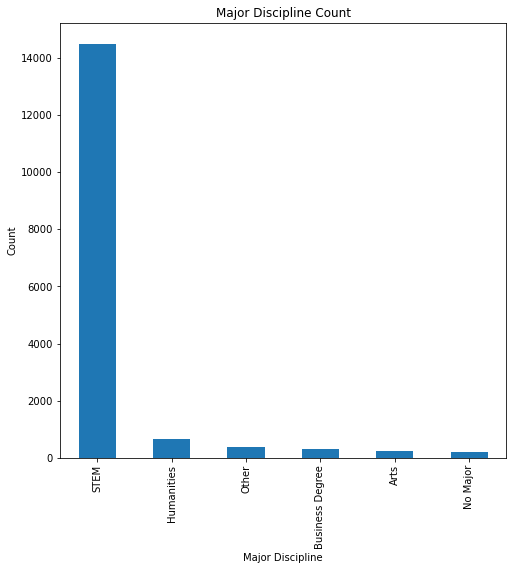

In [32]:
#fix major discipline
df.major_discipline.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Major Discipline Count')
plt.xlabel('Major Discipline')
plt.ylabel('Count');

In [33]:
df['major_discipline'].mode()

0    STEM
Name: major_discipline, dtype: object

In [34]:
df['major_discipline'] = df['major_discipline'].fillna('STEM')

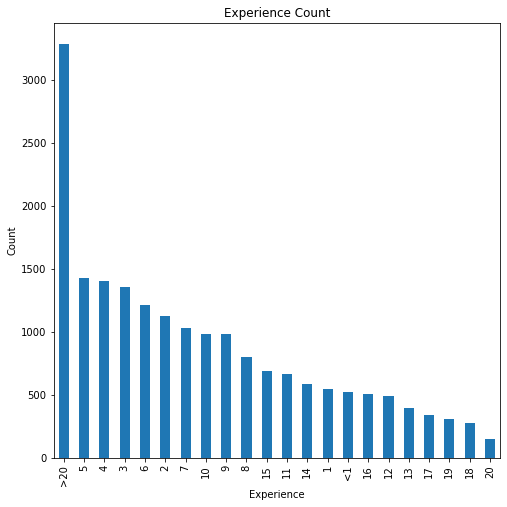

In [35]:
#fix experience
df.experience.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Experience Count')
plt.xlabel('Experience')
plt.ylabel('Count');

In [36]:
df['experience'].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [37]:
#convert <20 to 21 and <1 to 0
df['experience'] = df['experience'].replace('<1', '0')
df['experience'] = df['experience'].replace('>20','21')

In [38]:
df['experience'].mode()

0    21
Name: experience, dtype: object

In [39]:
df['experience'] = df['experience'].fillna('21')

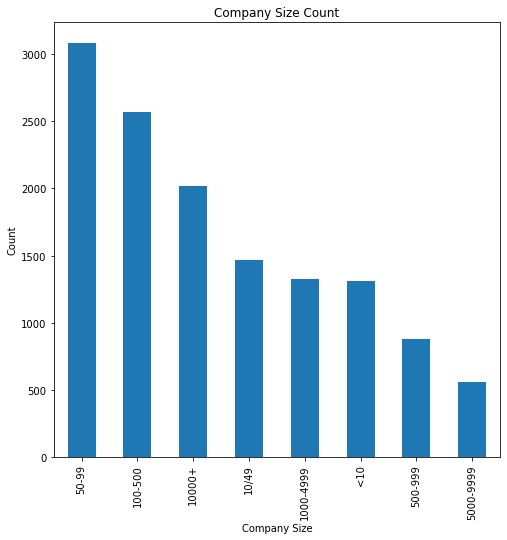

In [40]:
#fix company size
df.company_size.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Company Size Count')
plt.xlabel('Company Size')
plt.ylabel('Count');

In [41]:
#convert unusual values to the common trend
df['company_size'] = df['company_size'].replace('10000+', '10000-11000')
df['company_size'] = df['company_size'].replace('10/49', '10-49')
df['company_size'] = df['company_size'].replace('<10', '1-9')

In [42]:
df['company_size'].mode()

0    50-99
Name: company_size, dtype: object

In [43]:
df['company_size'] = df['company_size'].fillna('50-99')

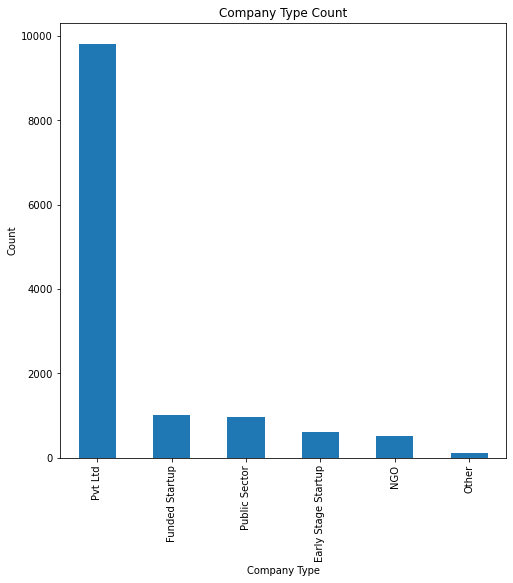

In [44]:
#fix company type
df.company_type.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Company Type Count')
plt.xlabel('Company Type')
plt.ylabel('Count');

In [45]:
df['company_type'].mode()

0    Pvt Ltd
Name: company_type, dtype: object

In [46]:
df['company_type'] = df['company_type'].fillna('Pvt Ltd')

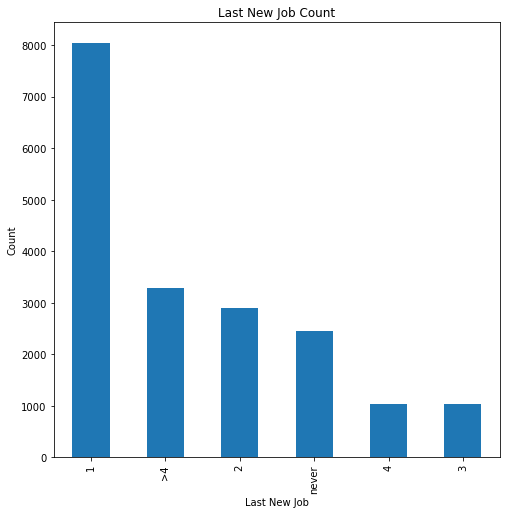

In [47]:
#fix last new job
df.last_new_job.value_counts().plot(kind='bar', figsize=(8,8))
plt.title('Last New Job Count')
plt.xlabel('Last New Job')
plt.ylabel('Count');

In [48]:
df['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [49]:
#convert the unsual values
df['last_new_job'] = df['last_new_job'].replace('>4', '5')
df['last_new_job'] = df['last_new_job'].replace('never', '0')

In [50]:
df['last_new_job'].mode()

0    1
Name: last_new_job, dtype: object

In [51]:
df['last_new_job'] = df['last_new_job'].fillna('1')

In [52]:
#confirm changes
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [53]:
#fix the target column
df.target = df.target.astype('category')

In [54]:
df.target.dtypes

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

In [55]:
df.dtypes

enrollee_id                  int64
city                        object
city_development_index     float64
gender                      object
relevent_experience         object
enrolled_university         object
education_level             object
major_discipline            object
experience                  object
company_size                object
company_type                object
last_new_job                object
training_hours               int64
target                    category
dtype: object

In [56]:
df.drop(['enrollee_id', 'city_development_index'], axis=1, inplace=True)

In [57]:
df.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'training_hours', 'target'],
      dtype='object')

#### Save cleaned dataframe

In [44]:
df.to_csv('cleaned_data.csv', index=False)

NameError: name 'df' is not defined

In [67]:
data = pd.read_csv('cleaned_data.csv')

# Data Visualization
let' draw some visual inferences from our refinde data set

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
from sklearn.model_selection import train_test_split

In [74]:
data.count()

city                   19158
gender                 19158
relevent_experience    19158
enrolled_university    19158
education_level        19158
major_discipline       19158
experience             19158
company_size           19158
company_type           19158
last_new_job           19158
training_hours         19158
target                 19158
dtype: int64

In [75]:
train = data[:14100]
test = data[14100:]

In [76]:
test

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
14100,city_19,Male,No relevent experience,Part time course,Graduate,STEM,21,5000-9999,Pvt Ltd,5,35,0.0
14101,city_19,Male,No relevent experience,Full time course,Graduate,STEM,1,50-99,Pvt Ltd,1,292,1.0
14102,city_46,Male,Has relevent experience,no_enrollment,Graduate,STEM,19,50-99,Pvt Ltd,0,64,0.0
14103,city_16,Male,No relevent experience,no_enrollment,Primary School,STEM,2,50-99,Pvt Ltd,0,150,0.0
14104,city_114,Other,Has relevent experience,no_enrollment,High School,STEM,14,50-99,Funded Startup,4,70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42,1.0
19154,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,52,1.0
19155,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4,44,0.0
19156,city_65,Male,Has relevent experience,no_enrollment,High School,STEM,0,500-999,Pvt Ltd,2,97,0.0


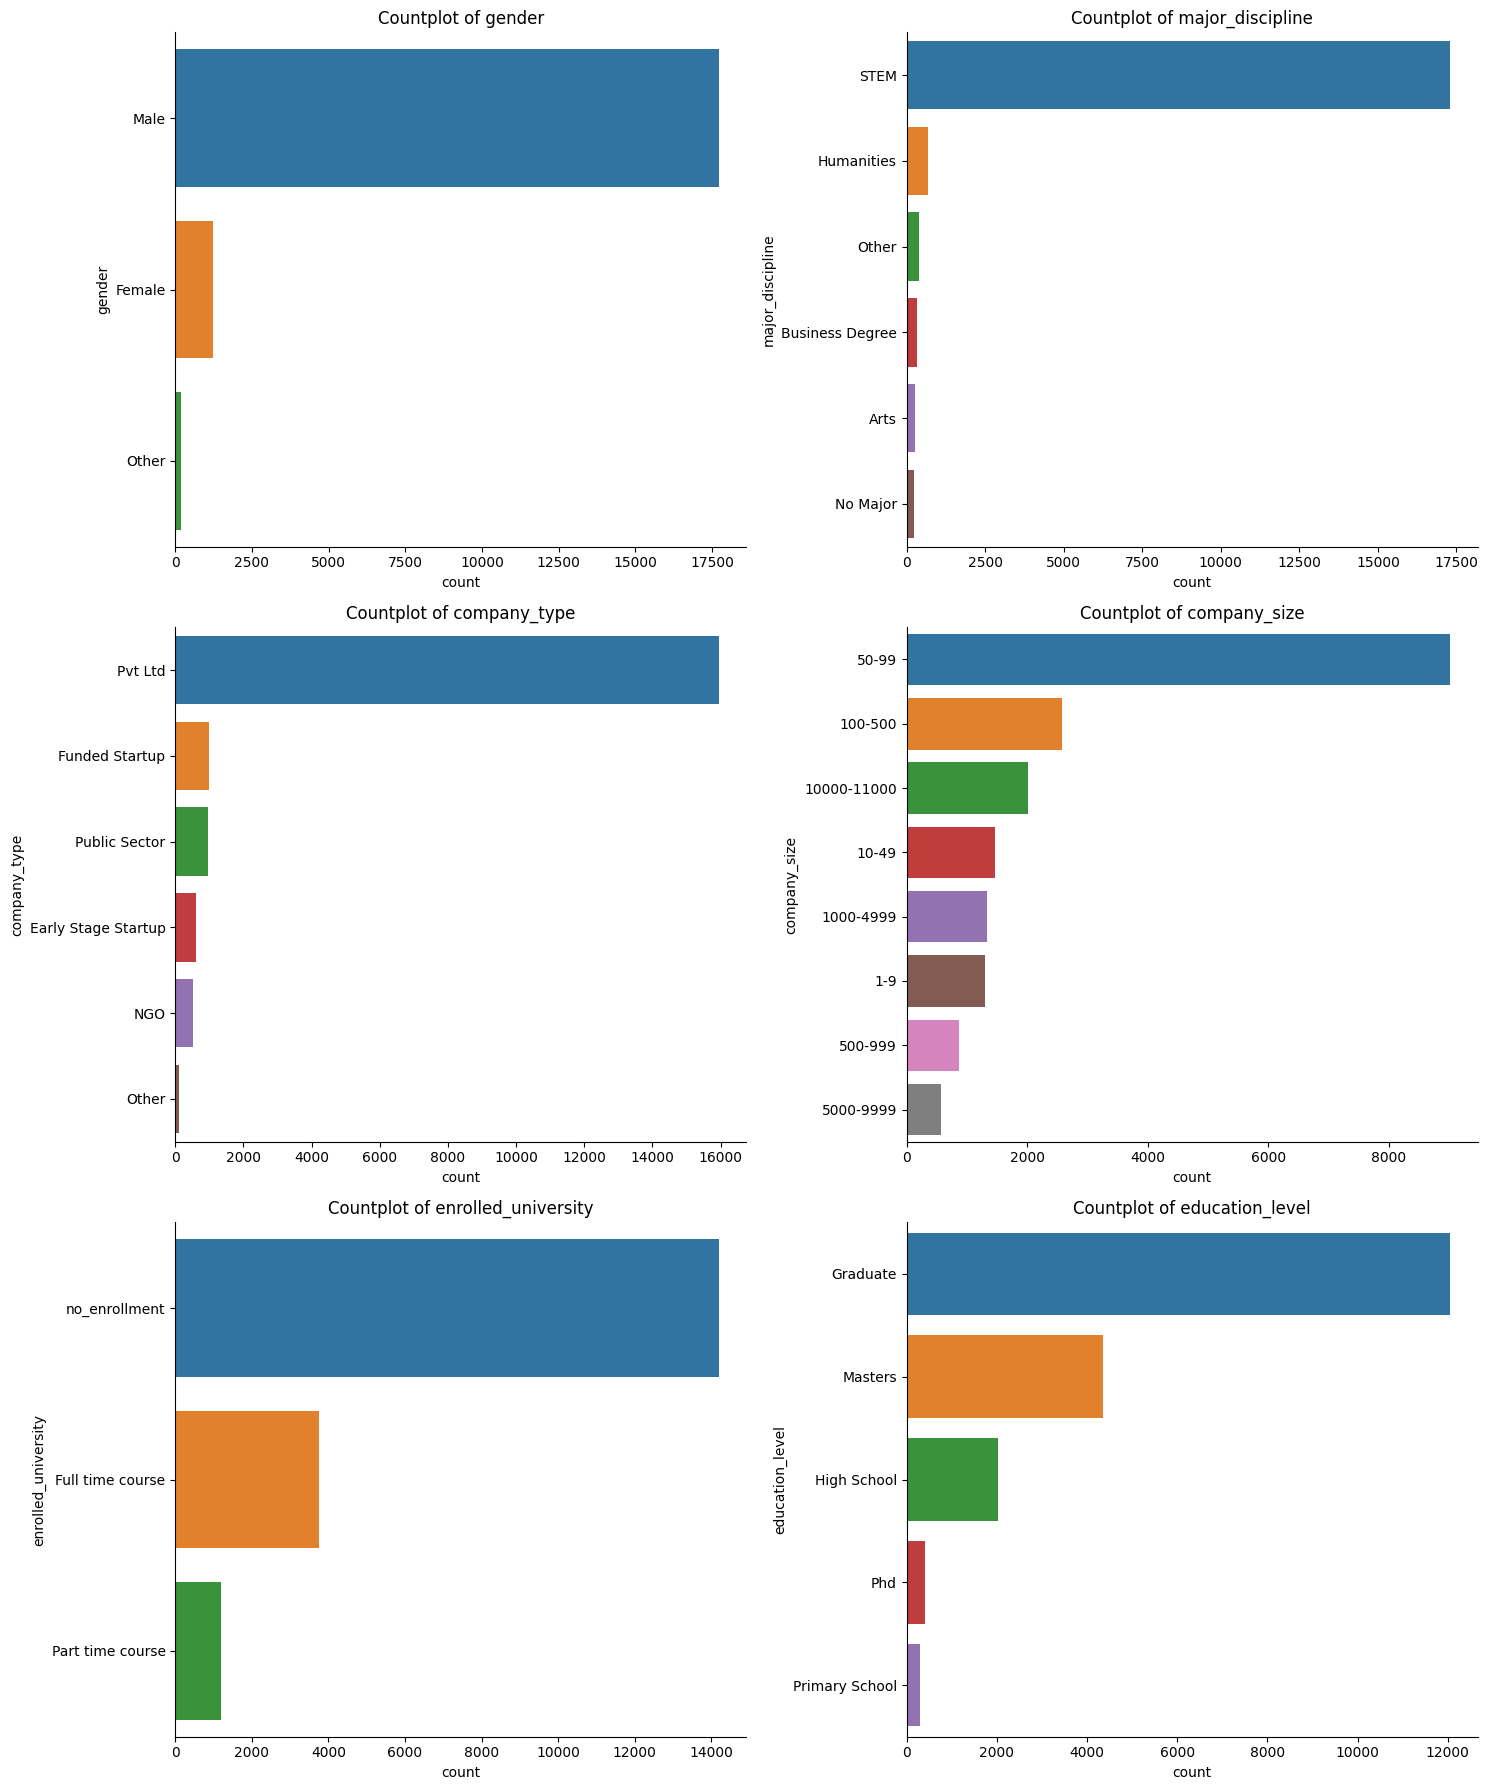

In [77]:
plt.figure(figsize=[15,18])

features=['gender','major_discipline','company_type','company_size','enrolled_university','education_level']
n=1

for f in features:
    plt.subplot(3,2,n)
    order=train[f].value_counts().index
    sns.countplot(y=X[f],order=order);
    sns.despine()
    plt.title("Countplot of {}".format(f))
    n=n+1
plt.tight_layout()

In [78]:
data.head

<bound method NDFrame.head of            city gender      relevent_experience enrolled_university  \
0      city_103   Male  Has relevent experience       no_enrollment   
1       city_40   Male   No relevent experience       no_enrollment   
2       city_21   Male   No relevent experience    Full time course   
3      city_115   Male   No relevent experience       no_enrollment   
4      city_162   Male  Has relevent experience       no_enrollment   
...         ...    ...                      ...                 ...   
19153  city_173   Male   No relevent experience       no_enrollment   
19154  city_103   Male  Has relevent experience       no_enrollment   
19155  city_103   Male  Has relevent experience       no_enrollment   
19156   city_65   Male  Has relevent experience       no_enrollment   
19157   city_67   Male   No relevent experience       no_enrollment   

      education_level major_discipline  experience company_size  \
0            Graduate             STEM          21

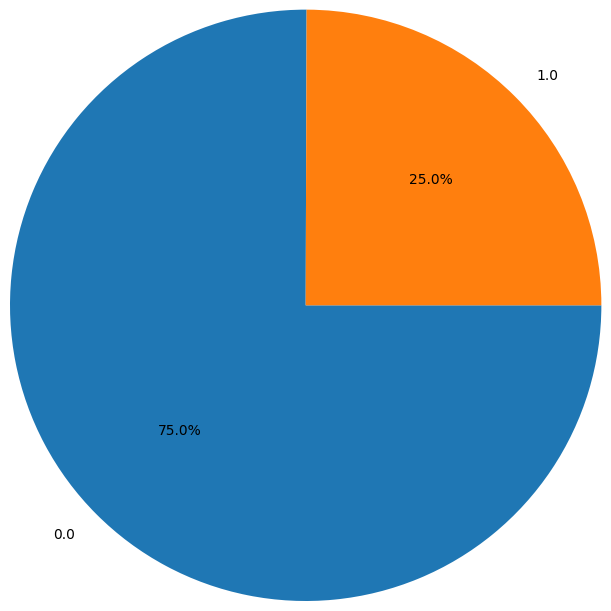

In [79]:
data=train['target'].value_counts()
plt.pie(data,labels=data.index,autopct='%0.1f%%',radius=2,counterclock=False);

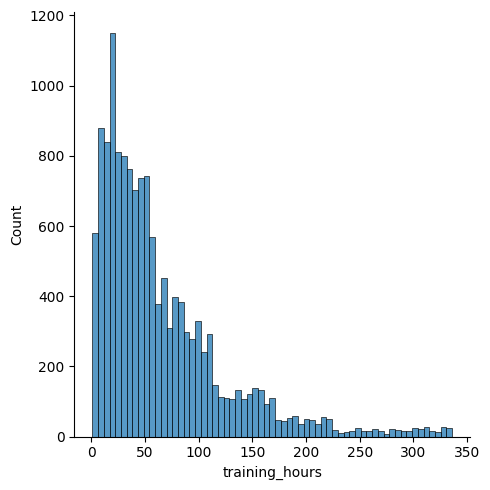

In [80]:
import seaborn as sns
sns.displot(train['training_hours']);

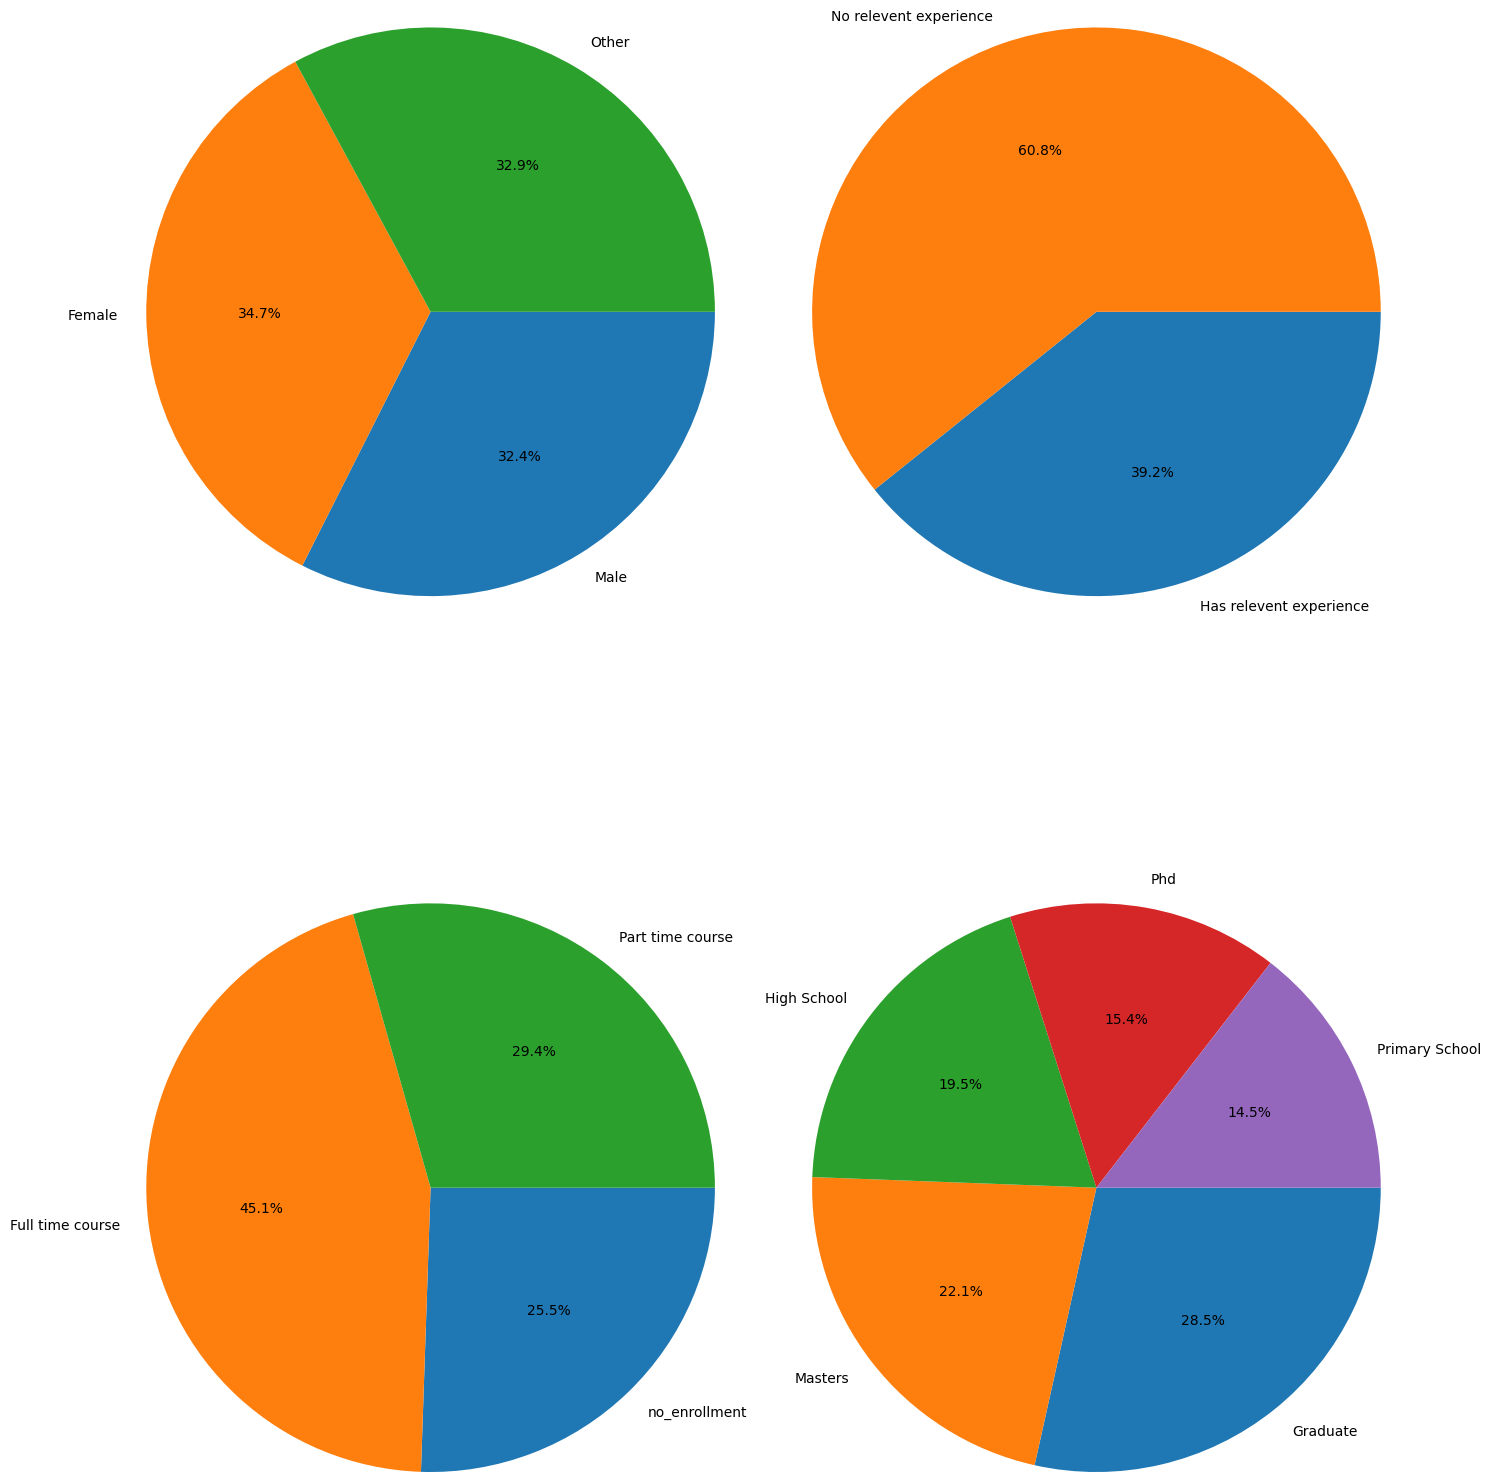

In [81]:
plt.figure(figsize=[15,18])

features=['gender','relevent_experience','enrolled_university','education_level']
n=1

for f in features:
    plt.subplot(2,2,n)
    
    df=100*train[train['target']==1][f].value_counts()/train[f].value_counts()
    plt.pie(df,labels=df.index,autopct='%0.1f%%',radius=1.3,counterclock=False);
    n=n+1
plt.tight_layout()

# Model building and prediction
since we have a cleaned data set now, it will be nice to build our model using spectral cluster algorithm.
1. then train our model with a subset of our cleaned data set 
2. as well as text its performance with the remaining subset of our dataset

In [2]:
# here we import the packages we will be needing
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=8, assign_labels='discretize', random_state = 0)

In [3]:
clustering

SpectralClustering(assign_labels='discretize', random_state=0)